In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
print(f'Train(X) Data shape:  {X_train.shape}' + f'       Train(Y) Data shape:  {Y_train.shape}')
print(f'Train(X) Data shape:  {X_test.shape}' + f'       Train(Y) Data shape:  {Y_test.shape}')

Train(X) Data shape:  (50000, 32, 32, 3)       Train(Y) Data shape:  (50000, 1)
Train(X) Data shape:  (10000, 32, 32, 3)       Train(Y) Data shape:  (10000, 1)


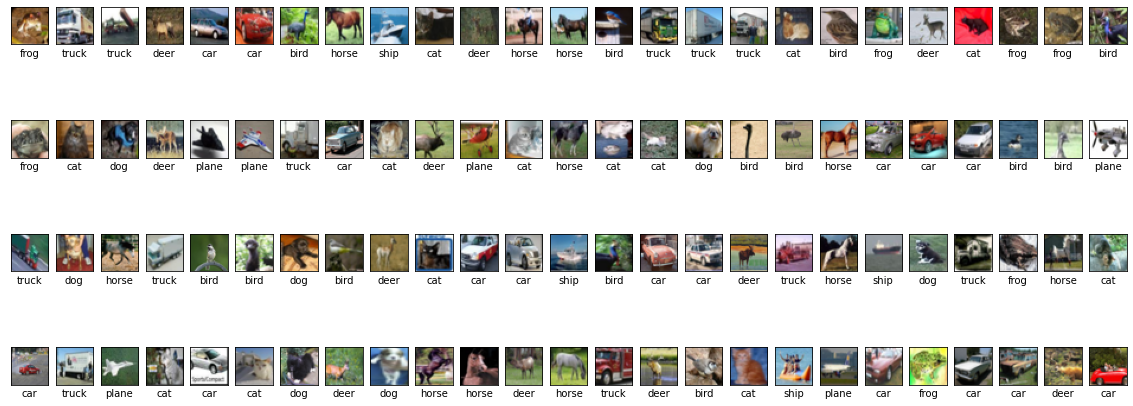

In [3]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(20,8))
for i in range(100):
    plt.subplot(4, 25, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classes[Y_train[i][0]])
    
plt.show()
     

   

In [4]:
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
Y_train = Y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
Y_test = Y_test[mask]


In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [6]:
import numpy as np

class KNearestNeighbor(object):
  def __init__(self):
    pass

  def train(self, X, y):
    self.X_train = X
    self.Y_train = y
    
  def predict(self, X, k=1, num_loops=0):
    if num_loops == 0:
      dists = self.compute_distances_no_loops(X)
    elif num_loops == 1:
      dists = self.compute_distances_one_loop(X)
    elif num_loops == 2:
      dists = self.compute_distances_two_loops(X)
    else:
      raise ValueError('Invalid value %d for num_loops' % num_loops)

    return self.predict_labels(dists, k=k)


  def compute_distances_no_loops(self, X):
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train)) 

    s1 = np.sum(X ** 2, axis=1)
    s2 = np.sum(self.X_train ** 2, axis=1)
    s = s1.reshape((num_test, 1)) + s2 - 2 * X.dot(self.X_train.T)
    dists = np.sqrt(s)

    return dists

  def predict_labels(self, dists, k=1):
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)
    for i in range(num_test):
      closest_y = []

      knn_ix = dists[i].argsort()[:k]
      closest_y = self.Y_train[knn_ix]
        
      values, counts = np.unique(closest_y, return_counts=True)
      y_pred[i] = values[counts == counts.max()].min()


    return y_pred

In [7]:
classifier = KNearestNeighbor()
classifier.train(X_train, Y_train)

dists = classifier.compute_distances_no_loops(X_test)
print(dists.shape)

(500, 5000)


In [8]:
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == Y_test)
accuracy = float(num_correct) / num_test
print ('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 25500 / 500 correct => accuracy: 51.000000


In [9]:
y_test_pred = classifier.predict_labels(dists, k=8)
num_correct = np.sum(y_test_pred == Y_test)
accuracy = float(num_correct) / num_test
print ('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 28500 / 500 correct => accuracy: 57.000000


In [10]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20]

X_train_folds = []
y_train_folds = []

X_train_folds = np.array(np.split(X_train, 5))
y_train_folds = np.split(Y_train,5)

k_to_accuracies = {}


fold_classifier = KNearestNeighbor()
for k in k_choices:
  k_to_accuracies[k] = []

  for validation_fold in range(0,num_folds):
    folds = np.arange(0, num_folds)
    folds = np.delete(folds, validation_fold)
    
    # current training set and labels
    X_train_fold = np.take(X_train_folds, folds, axis=0).reshape((4000, X_train_folds.shape[2]))
    y_train_fold = np.take(y_train_folds, folds, axis=0).reshape((4000))
    fold_classifier.train(X_train_fold, y_train_fold)
    
    # computing distance and predict
    dists_folds = fold_classifier.compute_distances_no_loops(X_train_folds[validation_fold,:,:])
    y_test_pred = fold_classifier.predict_labels(dists_folds, k=k)

    # computing accuracy
    num_correct = np.sum(y_test_pred == y_train_folds[validation_fold])
    accuracy = float(num_correct) / 1000

    k_to_accuracies[k].append(accuracy)



for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 99.000000
k = 1, accuracy = 104.000000
k = 1, accuracy = 97.000000
k = 1, accuracy = 98.000000
k = 1, accuracy = 99.000000
k = 3, accuracy = 99.000000
k = 3, accuracy = 104.000000
k = 3, accuracy = 97.000000
k = 3, accuracy = 98.000000
k = 3, accuracy = 99.000000
k = 5, accuracy = 102.000000
k = 5, accuracy = 100.260000
k = 5, accuracy = 97.000000
k = 5, accuracy = 97.085000
k = 5, accuracy = 99.000000
k = 8, accuracy = 102.000000
k = 8, accuracy = 100.000000
k = 8, accuracy = 97.000000
k = 8, accuracy = 97.000000
k = 8, accuracy = 99.000000
k = 10, accuracy = 102.000000
k = 10, accuracy = 100.000000
k = 10, accuracy = 97.000000
k = 10, accuracy = 97.000000
k = 10, accuracy = 99.000000
k = 12, accuracy = 102.000000
k = 12, accuracy = 100.000000
k = 12, accuracy = 97.000000
k = 12, accuracy = 97.000000
k = 12, accuracy = 99.000000
k = 15, accuracy = 99.000000
k = 15, accuracy = 100.000000
k = 15, accuracy = 97.000000
k = 15, accuracy = 97.000000
k = 15, accuracy = 99.0

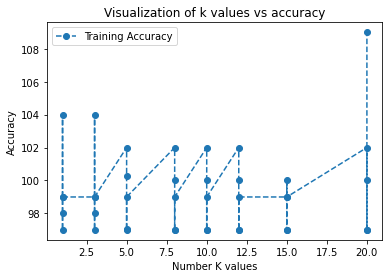

In [11]:
k_values=[]
accuracy_values =[]
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        k_values.append(k)
        accuracy_values.append(accuracy)

plt.title('Visualization of k values vs accuracy')
plt.plot(k_values, accuracy_values,'o--', label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number K values')
plt.ylabel('Accuracy')
plt.show()